# Visualize all analysis: bike trip data, matched trips etc

# trips_by_weekday_summary

<Figure size 1152x648 with 0 Axes>

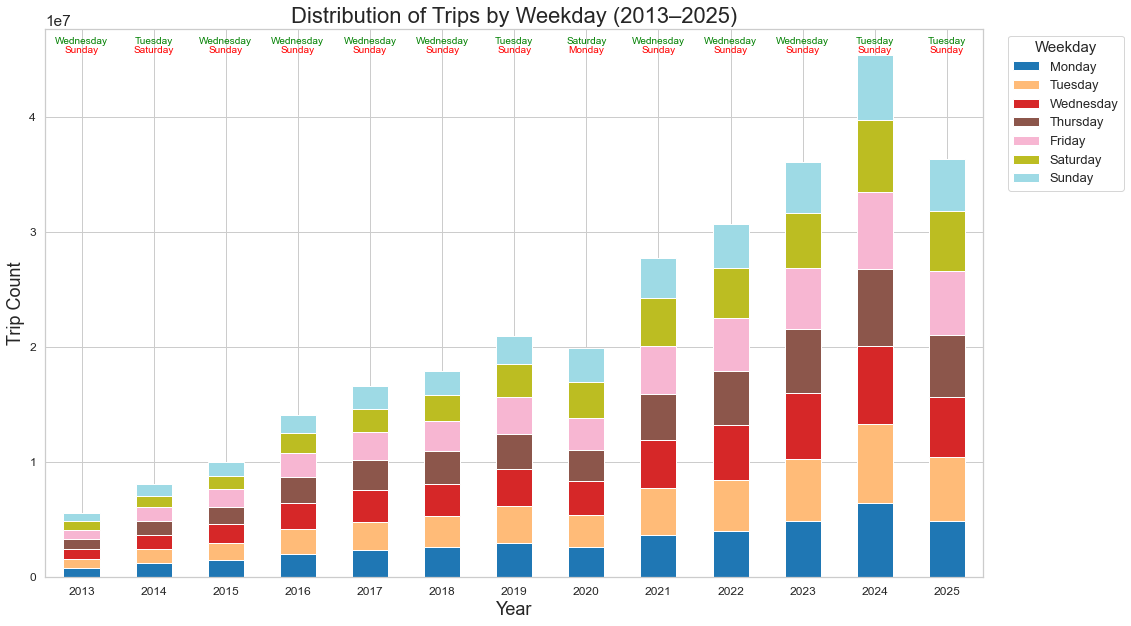

‚úÖ Plot with highlights saved to: ..\results\dataAnalysis\extra_analysis\trips_by_weekday_summary_highlighted.png


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up paths
results_root = Path("../results/dataAnalysis")
output_image = results_root / "extra_analysis" / "trips_by_weekday_summary_highlighted.png"

# Read all 'trips_by_weekday.csv' files
combined_data = []
for csv_file in results_root.glob("*/trips_by_weekday.csv"):
    year = csv_file.parent.name
    df = pd.read_csv(csv_file)
    df['Year'] = int(year)
    combined_data.append(df)

# Combine all data
all_weekday_data = pd.concat(combined_data, ignore_index=True)

# Pivot table: rows = years, columns = weekdays
pivot_df = all_weekday_data.pivot(index='Year', columns='Unnamed: 0', values='count')

# Ensure weekdays are in correct order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_df = pivot_df[weekday_order]

# Plot setup
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid", font_scale=1.4)

# Bar plot
ax = pivot_df.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(16, 9),
    fontsize=12
)

# Add annotations for busiest and least busy days
for i, year in enumerate(pivot_df.index):
    year_data = pivot_df.loc[year]
    busiest_day = year_data.idxmax()
    least_busy_day = year_data.idxmin()
    busiest_val = year_data.max()
    #least_busy_val = year_data.min()
    # Annotate busiest day
    y_offset = busiest_val * 5.8
    ax.text(i, 46200000, f"{busiest_day}", ha='center', va='bottom', fontsize=10, color='green') #busiest_val + y_offset
 
    # Annotate least busy day
    ax.text(i, 45800000, f"{least_busy_day}", ha='center', va='center', fontsize=10, color='red') ##least_busy_val *9
    # For each weekday, track bar top position

# Plot decorations
plt.title("Distribution of Trips by Weekday (2013‚Äì2025)", fontsize=22)
plt.ylabel("Trip Count", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(rotation=0)
plt.legend(title="Weekday", bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=13, title_fontsize=15)

plt.tight_layout()
plt.savefig(output_image, dpi=300)
plt.show()

print(f"‚úÖ Plot with highlights saved to: {output_image}")


# trips_by_hour_summary

<Figure size 1152x648 with 0 Axes>

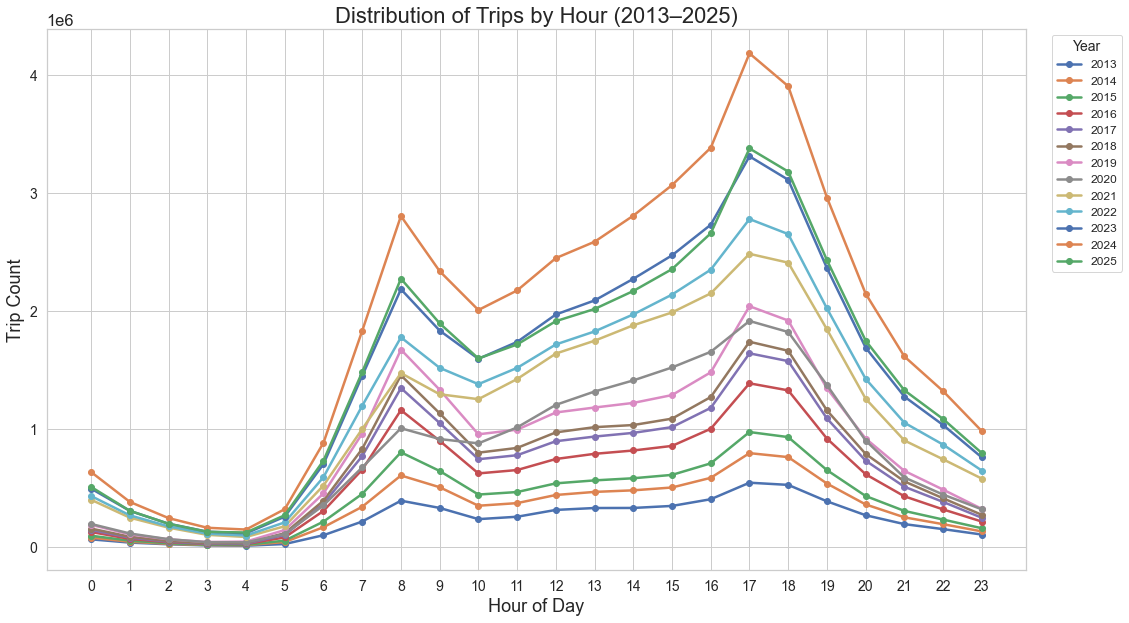

‚úÖ Plot saved to: ..\results\dataAnalysis\extra_analysis\trips_by_hour_summary.png


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === Paths ===
results_root = Path("..//results//dataAnalysis")
output_image = results_root / "extra_analysis" / "trips_by_hour_summary.png"

# === Read all trips_by_hour.csv files ===
combined_data = []
for csv_file in results_root.glob("*/trips_by_hour.csv"):
    year = csv_file.parent.name
    df = pd.read_csv(csv_file)
    df['Year'] = int(year)
    df['Hour'] = df.index  # Assume the hour is the index (0-23)
    combined_data.append(df)

# === Combine data into one DataFrame ===
all_hourly_data = pd.concat(combined_data, ignore_index=True)

# Pivot: index = Hour, columns = Year, values = count
pivot_df = all_hourly_data.pivot_table(index='Hour', columns='Year', values='count')

# === Plotting ===
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid", font_scale=1.5)

pivot_df.plot(
    kind='line',
    marker='o',
    figsize=(16, 9),
    linewidth=2.5
)

plt.title("Distribution of Trips by Hour (2013‚Äì2025)", fontsize=22)
plt.xlabel("Hour of Day", fontsize=18)
plt.ylabel("Trip Count", fontsize=18)
plt.xticks(range(0, 24), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Year", fontsize=12, title_fontsize=14, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.savefig(output_image, dpi=300)
plt.show()

print(f"‚úÖ Plot saved to: {output_image}")


# Top 10 busy stations and percentage of long trips

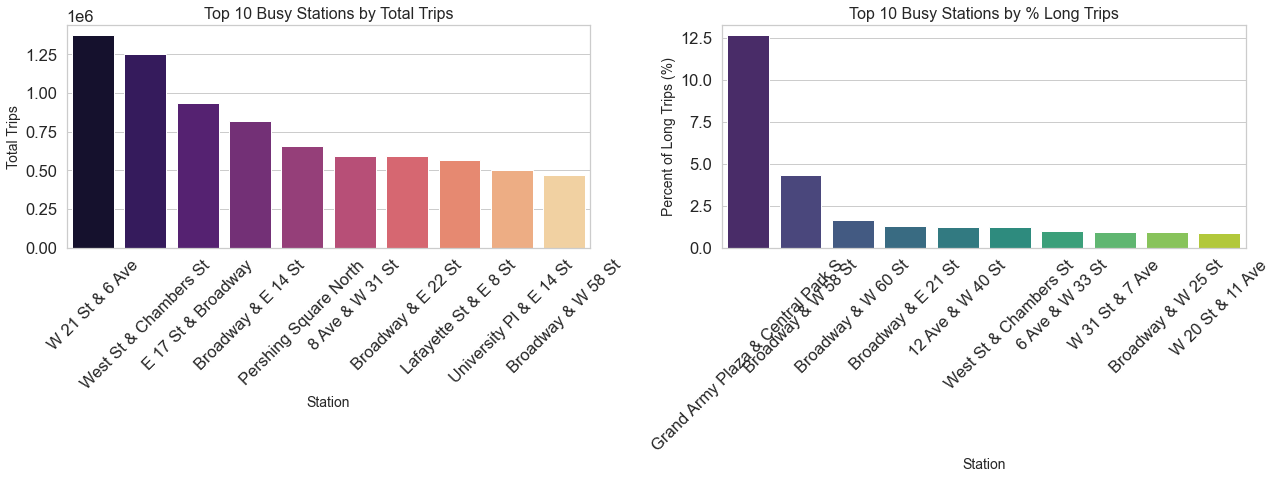

‚úÖ Plot saved to: ..\results\dataAnalysis\extra_analysis\top10_stations_dual_axis.png


In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Folder containing all yearly CSVs
data_folder = Path("../results/dataAnalysis")
csv_files = list(data_folder.glob("*/long_trip_station_stats_top10.csv"))
output_image = results_root / "extra_analysis" / "trips_by_hour_summary.png"
# Load and concatenate all years
df_list = []
for csv_file in csv_files:
    year = int(csv_file.parent.name)
    df = pd.read_csv(csv_file)
    df['Year'] = year
    df_list.append(df)

all_data = pd.concat(df_list, ignore_index=True)

# Aggregate by station across all years
summary = all_data.groupby('Unnamed: 0').agg({
    'total_trips': 'sum',
    'long_trips': 'sum'
})

summary['percent_long_trips'] = summary['long_trips'] / summary['total_trips'] * 100

# Prepare top 10 for percent long trips
top10_percent = summary.sort_values(by='percent_long_trips', ascending=False).head(10)

# Prepare top 10 for total trips
top10_total = summary.sort_values(by='total_trips', ascending=False).head(10)

# Plot side by side with switched positions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Left: Total Trips
sns.barplot(
    x=top10_total.index,
    y='total_trips',
    data=top10_total,
    palette='magma',
    ax=axes[0]
)
axes[0].set_title('Top 10 Busy Stations by Total Trips', fontsize=16)
axes[0].set_ylabel('Total Trips', fontsize=14)
axes[0].set_xlabel('Station', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Right: Percent Long Trips
sns.barplot(
    x=top10_percent.index,
    y='percent_long_trips',
    data=top10_percent,
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Top 10 Busy Stations by % Long Trips', fontsize=16)
axes[1].set_ylabel('Percent of Long Trips (%)', fontsize=14)
axes[1].set_xlabel('Station', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save the figure
plt.savefig(output_image, dpi=300)

plt.show()

print(f"‚úÖ Plot saved to: {output_path}")


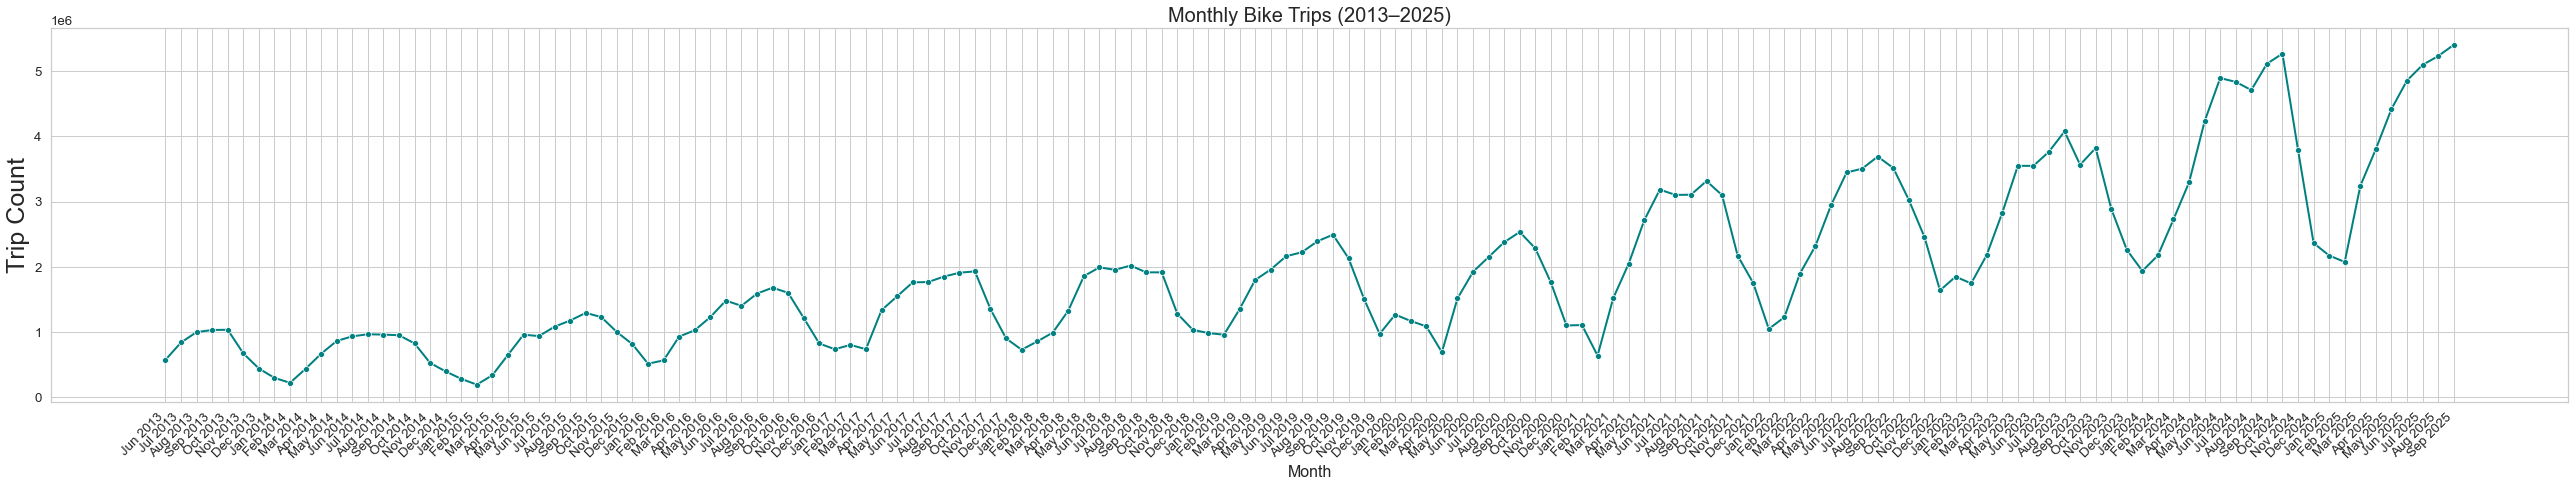

‚úÖ Month-Year plot saved to: ..\results\dataAnalysis\extra_analysis\bike_usage_per_month_all_years_with_month_year.png


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load all year-wise data
results_root = Path("../results/dataAnalysis")
all_data = []

for file in results_root.glob("*/bike_usage_per_month.csv"):
    year = int(file.parent.name)
    df = pd.read_csv(file)
    #if 'trip_count' not in df.columns:
    df.columns = ['month', 'trip_count']
    df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
    df['year'] = df['month'].dt.year
    
    # Filter rows that match folder year
    df = df[df['year'] == year]
    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)

# Sort by date
combined_df = combined_df.sort_values('month')

# Format for x-axis
combined_df['month_label'] = combined_df['month'].dt.strftime('%b %Y')  # e.g. Jan 2014

# --- Plot 1: All Months per Year (x-axis = month-year)
plt.figure(figsize=(36, 7))
sns.set(style="whitegrid", font_scale=1.2)

sns.lineplot(
    data=combined_df,
    x='month_label',
    y='trip_count',
    marker='o',
    linewidth=2,
    color='teal'
)

plt.title("Monthly Bike Trips (2013‚Äì2025)", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Trip Count", fontsize=25)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure
output_folder = results_root / "extra_analysis"
output_folder.mkdir(exist_ok=True)
output_file1 = output_folder / "bike_usage_per_month_all_years_with_month_year.png"
plt.savefig(output_file1, dpi=300)
plt.show()

print(f"‚úÖ Month-Year plot saved to: {output_file1}")


# top 10 bike stations with the highest number of long trips

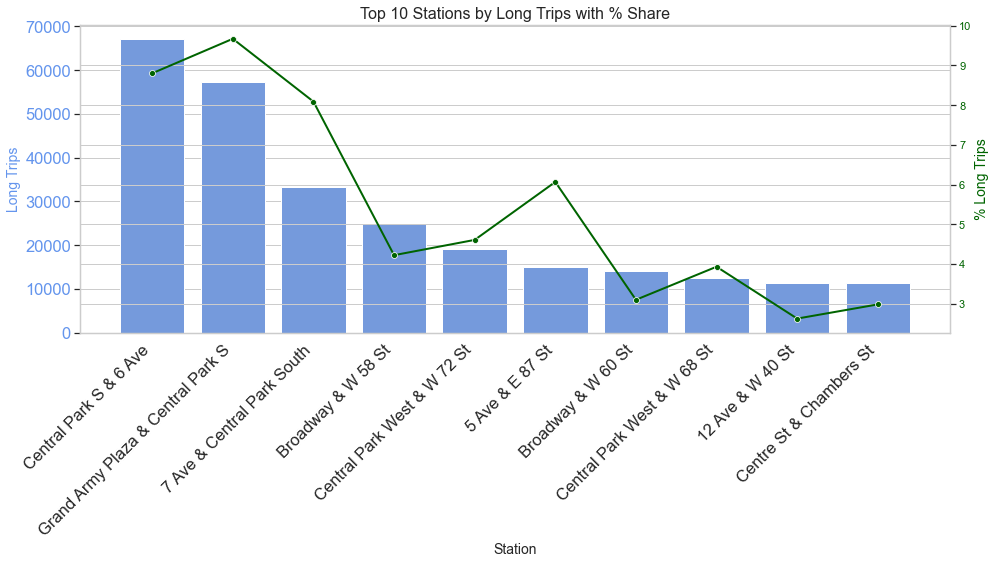

‚úÖ Plot saved to: ..\results\dataAnalysis\extra_analysis\long_trips_top_stations_dual_axis.png


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === Setup ===
data_dir = Path("../results/dataAnalysis")
output_file = data_dir / "extra_analysis" / "long_trips_top_stations_dual_axis.png"
summary_files = list(data_dir.glob("*/long_trip_station_summary.csv"))

# === Combine All Files ===
all_data = []
for file in summary_files:
    df = pd.read_csv(file)
    df.columns = ['station', 'total_trips', 'long_trips', 'percent_long_trips']
    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)

# === Group by Station (merge same stations) ===
grouped = combined_df.groupby('station', as_index=False).agg({
    'total_trips': 'sum',
    'long_trips': 'sum'
})

# === Calculate updated percentage ===
grouped['percent_long_trips'] = (grouped['long_trips'] / grouped['total_trips']) * 100

# === Select Top 10 Stations by Long Trips ===
top10 = grouped.sort_values(by='long_trips', ascending=False).head(10)

# === Plotting ===
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.set(style="whitegrid")

# Barplot: Long trips
sns.barplot(x='station', y='long_trips', data=top10, ax=ax1, color='cornflowerblue')
ax1.set_ylabel("Long Trips", color='cornflowerblue', fontsize=14)
ax1.set_xlabel("Station", fontsize=14)
ax1.tick_params(axis='y', labelcolor='cornflowerblue')
ax1.set_xticklabels(top10['station'], rotation=45, ha='right')

# Line plot: Percent long trips (secondary axis)
ax2 = ax1.twinx()
sns.lineplot(x='station', y='percent_long_trips', data=top10, ax=ax2, color='darkgreen', marker='o', linewidth=2)
ax2.set_ylabel("% Long Trips", color='darkgreen', fontsize=14)
ax2.tick_params(axis='y', labelcolor='darkgreen')

# Title and layout
plt.title("Top 10 Stations by Long Trips with % Share", fontsize=16)
plt.tight_layout()

# === Save ===
output_file.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(output_file, dpi=300)
plt.show()

print(f"‚úÖ Plot saved to: {output_file}")


# User Type Distribution

<Figure size 1008x576 with 0 Axes>

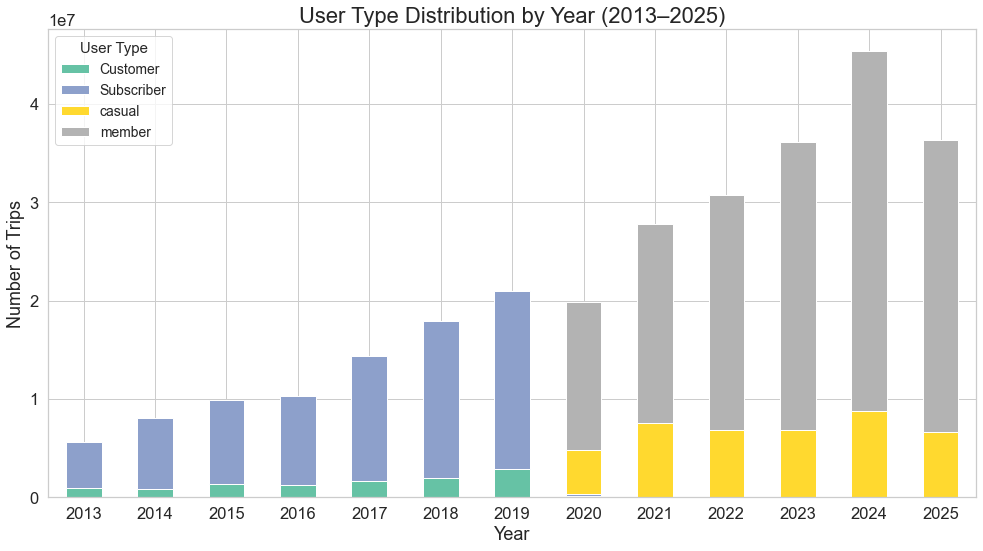

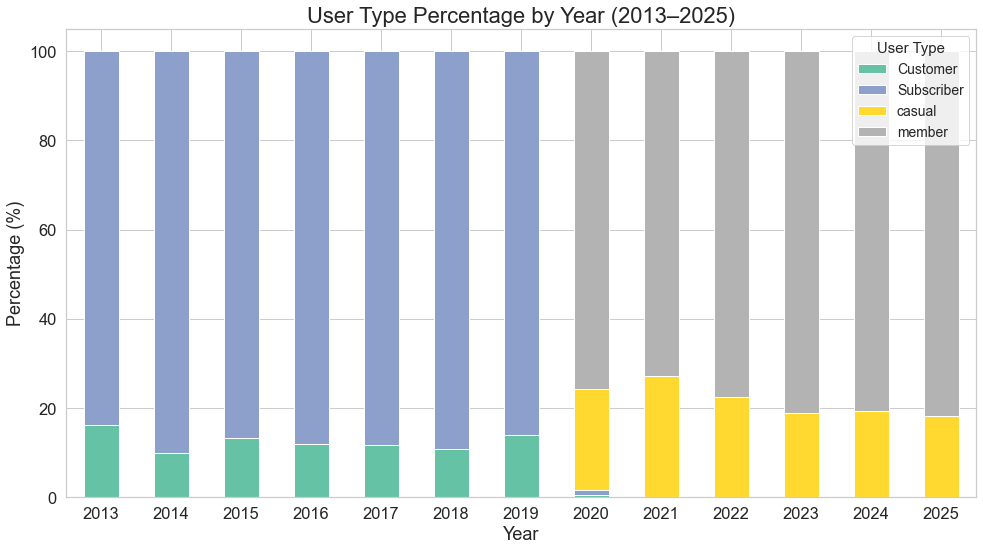

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plot style
sns.set(style="whitegrid", font_scale=1.5)

# Paths
results_root = Path("../results/dataAnalysis")
output_dir = results_root / "extra_analysis"
output_dir.mkdir(parents=True, exist_ok=True)

# Read all usertype_counts.csv files
all_usertype_data = []
for csv_file in results_root.glob("*/usertype_counts.csv"):
    year = csv_file.parent.name
    df = pd.read_csv(csv_file)
    df["Year"] = int(year)
    all_usertype_data.append(df)

# Combine data
usertype_df = pd.concat(all_usertype_data, ignore_index=True)

# Pivot for plotting
pivot_usertype = usertype_df.pivot(index="Year", columns="Unnamed: 0", values="count").fillna(0)

# Plot 1: Stacked bar chart over the years
plt.figure(figsize=(14, 8))
pivot_usertype.plot(
    kind="bar",
    stacked=True,
    colormap="Set2",
    figsize=(14, 8)
)
plt.title("User Type Distribution by Year (2013‚Äì2025)", fontsize=22)
plt.ylabel("Number of Trips", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(rotation=0)
plt.legend(title="User Type", fontsize=14, title_fontsize=15)
plt.tight_layout()
plt.savefig(output_dir / "user_type_distribution_by_year.png", dpi=300)
plt.show()

# Plot 2: Percentage by year
percent_df = pivot_usertype.div(pivot_usertype.sum(axis=1), axis=0) * 100
percent_df.plot(
    kind="bar",
    stacked=True,
    colormap="Set2",
    figsize=(14, 8)
)
plt.title("User Type Percentage by Year (2013‚Äì2025)", fontsize=22)
plt.ylabel("Percentage (%)", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(rotation=0)
plt.legend(title="User Type", fontsize=14, title_fontsize=15)
plt.tight_layout()
plt.savefig(output_dir / "user_type_percentage_by_year.png", dpi=300)
plt.show()


# Gender

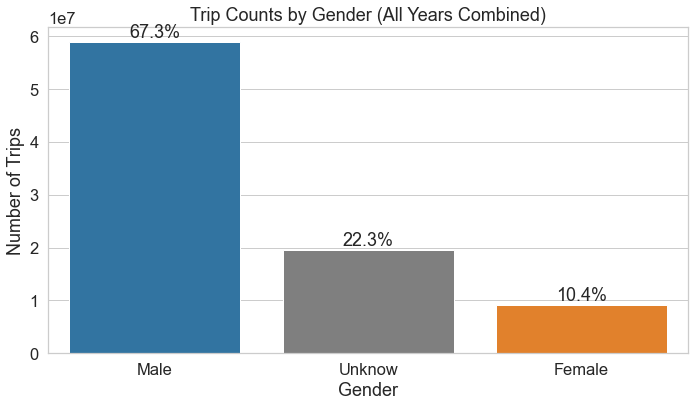

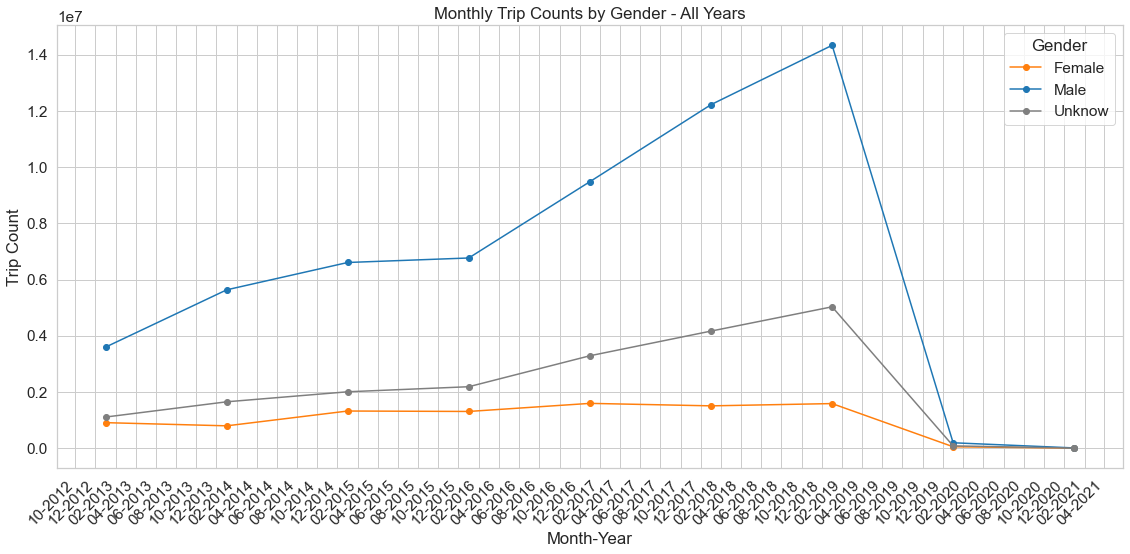

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.dates as mdates
# Set up paths
results_root = Path("../results/dataAnalysis")
output_dir = results_root / "extra_analysis"
output_dir.mkdir(parents=True, exist_ok=True)

# Define fixed colors for genders
gender_colors = {
    'Male': '#1f77b4',     # blue
    'Female': '#ff7f0e',   # orange
    'Unknow': '#7f7f7f'    # gray
}

# Load all gender_distribution.csv files from year subfolders
all_data = []
for csv_file in results_root.glob("*/gender_distribution.csv"):
    year = int(csv_file.parent.name)
    df = pd.read_csv(csv_file)
    df['year'] = year
    all_data.append(df)

# Combine all years into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Rename first column to 'label' (gender)
combined_df.rename(columns={combined_df.columns[0]: 'label'}, inplace=True)

# --- Plot 1: Total trip counts by gender (all years combined) ---

# Aggregate counts by gender
total_gender_counts = combined_df.groupby('label')['count'].sum().reset_index()
total_gender_counts.rename(columns={'label': 'Gender', 'count': 'Trip Count'}, inplace=True)

# Calculate percentage
total_trips = total_gender_counts['Trip Count'].sum()
total_gender_counts['Percentage'] = 100 * total_gender_counts['Trip Count'] / total_trips

# Sort for better visualization
total_gender_counts = total_gender_counts.sort_values(by='Trip Count', ascending=False)

# Plot bar chart with fixed colors
sns.set(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=total_gender_counts,
    x='Gender', y='Trip Count',
    palette=[gender_colors.get(g, '#333333') for g in total_gender_counts['Gender']]
)

# Add percentage labels on top of bars
for p, percentage in zip(ax.patches, total_gender_counts['Percentage']):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + total_trips*0.01, f'{percentage:.1f}%', ha="center")

plt.title("Trip Counts by Gender (All Years Combined)")
plt.ylabel("Number of Trips")
plt.xlabel("Gender")
plt.tight_layout()
plt.savefig(output_dir / "gender_distribution_all_years.png", dpi=300)
plt.show()


# --- Plot 2: Monthly trip counts by gender over time ---

if 'month' not in combined_df.columns:
    combined_df['month'] = 1

combined_df['date'] = pd.to_datetime(combined_df[['year', 'month']].assign(day=1))

monthly_grouped = combined_df.groupby(['date', 'label'], as_index=False)['count'].sum()
pivot_df = monthly_grouped.pivot(index='date', columns='label', values='count').fillna(0)



# ... previous code ...

sns.set(style="whitegrid", font_scale=1.4)
plt.figure(figsize=(16, 8))

for gender in pivot_df.columns:
    plt.plot(
        pivot_df.index, pivot_df[gender],
        marker='o',
        label=gender,
        color=gender_colors.get(gender, '#333333')
    )

plt.title("Monthly Trip Counts by Gender - All Years")
plt.xlabel("Month-Year")
plt.ylabel("Trip Count")

# Format x-axis to show months as numbers with years, with ticks every 2 months
ax = plt.gca()

# Set major locator every 2 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# Set major formatter to show month number and year (e.g. 1-2013)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()

output_file = output_dir / "monthly_gender_distribution_all_years.png"
plt.savefig(output_file, dpi=300)
plt.show()


# Bike involved accident

üö¥ Total cyclist-related accidents: 63641


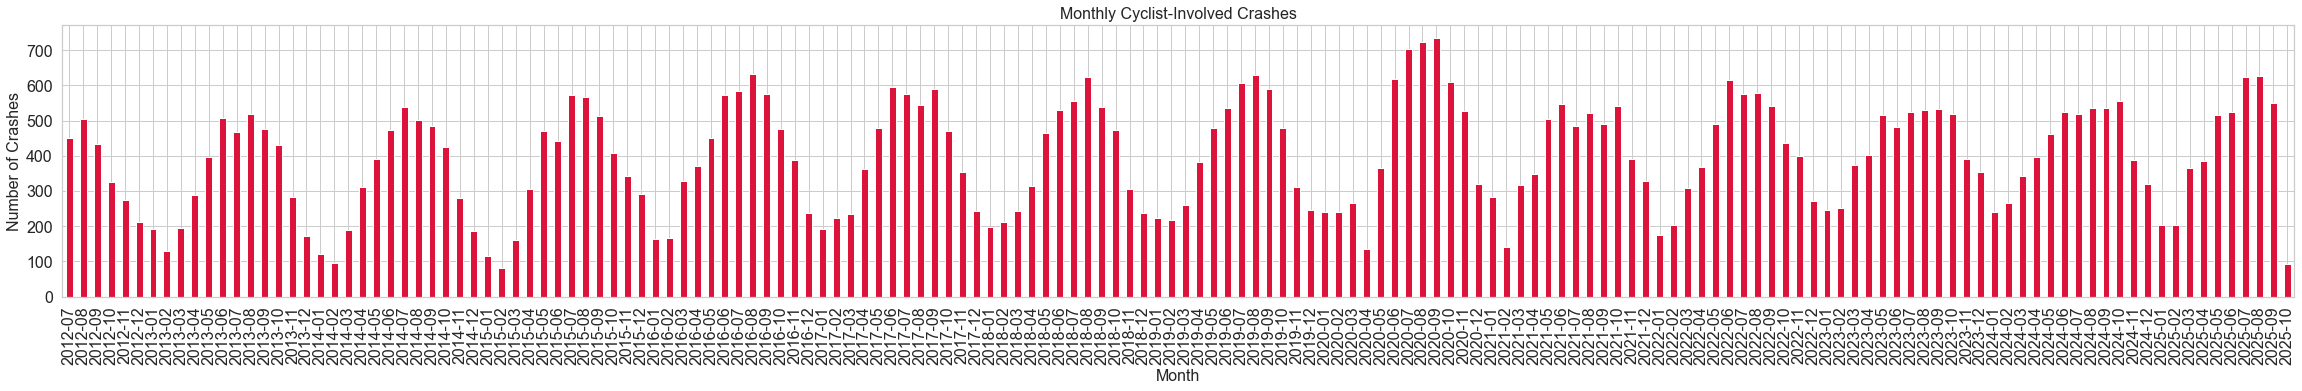

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

results_root = Path("../results/dataAnalysis")
output_dir = results_root / "extra_analysis"
output_dir.mkdir(parents=True, exist_ok=True)
# Path to your CSV file
file_path = r"C:\Users\yanhu\Documents\Python_Notebook\AXA_task\accident_data\sorted_bike_crashes.csv"
# Load the dataset
bike_accidents = pd.read_csv(file_path)
#print(bike_accidents.columns.tolist())
# Display the first few rows
#print(bike_accidents.head())
# Convert date and time

print(f"üö¥ Total cyclist-related accidents: {len(bike_accidents)}")
# Group by month and count accidents
bike_accidents['CRASH_DATETIME'] = pd.to_datetime(bike_accidents['CRASH_DATETIME'], errors='coerce')

monthly_bike_crashes = bike_accidents['CRASH_DATETIME'].dt.to_period('M').value_counts().sort_index()

monthly_bike_crashes.plot(kind='bar', figsize=(40, 5), color='crimson')
plt.title("Monthly Cyclist-Involved Crashes", fontsize = 16)
plt.xlabel("Month", fontsize = 16)
plt.ylabel("Number of Crashes", fontsize = 16)
plt.grid(True)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
output_file = output_dir / "Monthly Cyclist-Involved Crashes.png"
plt.savefig(output_file, dpi=300)
plt.show()


# Monthly Trips and Cyclist-Involved Crashes: Matched vs Total Raw Data

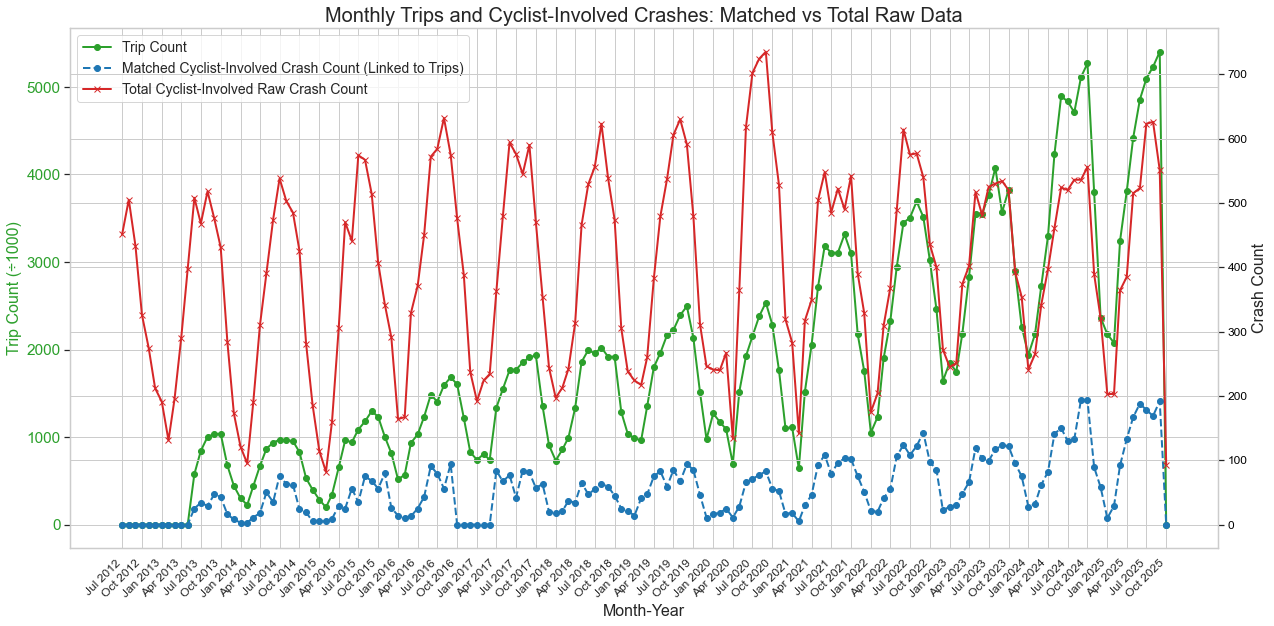

‚úÖ Plot saved to: ..\results\dataAnalysis\extra_analysis\monthly_trips_matched_vs_raw_crashes_all_months.png


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup paths
results_root = Path("../results/dataAnalysis")
output_dir = results_root / "extra_analysis"
output_dir.mkdir(parents=True, exist_ok=True)

# Load monthly usage with crashes data (summary)
all_data = []
for csv_file in results_root.glob("*/monthly_usage_with_crashes.csv"):
    folder_year = int(csv_file.parent.name)
    df = pd.read_csv(csv_file)
    df = df[df['year'] == folder_year]  # Filter by year from folder
    all_data.append(df)
    
    #df = pd.read_csv(csv_file)
    #all_data.append(df)
combined_df = pd.concat(all_data, ignore_index=True)

# Convert year/month to datetime
combined_df['date'] = pd.to_datetime(combined_df[['year', 'month']].assign(day=1))
combined_df = combined_df.sort_values('date')

# Load raw crash data from full crash CSV
file_path = r"C:\Users\yanhu\Documents\Python_Notebook\AXA_task\accident_data\sorted_bike_crashes.csv"
bike_accidents = pd.read_csv(file_path)
bike_accidents['CRASH_DATETIME'] = pd.to_datetime(bike_accidents['CRASH_DATETIME'], errors='coerce')

# Count raw crashes per month
monthly_bike_crashes = (
    bike_accidents['CRASH_DATETIME']
    .dropna()
    .dt.to_period('M')
    .value_counts()
    .sort_index()
    .to_frame()
    .reset_index()
)
monthly_bike_crashes.columns = ['period', 'crash_count_raw']
monthly_bike_crashes['date'] = monthly_bike_crashes['period'].dt.to_timestamp()

# Merge raw crash counts into summary df on date
merged_df = pd.merge(combined_df, monthly_bike_crashes[['date', 'crash_count_raw']], on='date', how='outer')

# === Ensure all months are included ===
full_date_range = pd.date_range(
    start=merged_df['date'].min(),
    end=merged_df['date'].max(),
    freq='MS'  # Month start frequency
)
merged_df = merged_df.set_index('date').reindex(full_date_range).rename_axis('date').reset_index()

# Fill NaNs with 0
merged_df['trip_count'] = merged_df['trip_count'].fillna(0).astype(int)
merged_df['crash_count'] = merged_df['crash_count'].fillna(0).astype(int)
merged_df['crash_count_raw'] = merged_df['crash_count_raw'].fillna(0).astype(int)

# Plotting
sns.set(style="whitegrid", font_scale=1.4)
fig, ax1 = plt.subplots(figsize=(18, 9))

color_trips = 'tab:green'
color_crashes_matched = 'tab:blue'
color_crashes_raw = 'tab:red'

# Plot trip counts on left y-axis
ax1.set_xlabel("Month-Year", fontsize=16)
ax1.set_ylabel("Trip Count", color=color_trips, fontsize=16)

# Plot trip counts
trip_scale = 1000
#ax1.plot(combined_df.index, combined_df['trip_count'] / trip_scale,
#         label=f'Trip Count (√∑{trip_scale})', color='tab:green', marker='o', linewidth=2)

ax1.plot(merged_df['date'], merged_df['trip_count']/ trip_scale, marker='o', linewidth=2.0, color=color_trips, label='Trip Count')

ax1.set_ylabel(f'Trip Count (√∑{trip_scale})', color='tab:green')





ax1.tick_params(axis='y', labelcolor=color_trips)

# Format x-axis ticks (every 3rd month for readability)
ax1.set_xticks(merged_df['date'][::3])
ax1.set_xticklabels(merged_df['date'][::3].dt.strftime('%b %Y'), rotation=45, ha='right', fontsize=12)

# Second y-axis for crash counts
ax2 = ax1.twinx()
ax2.set_ylabel("Crash Count", fontsize=16)

# Matched crash count
ax2.plot(
    merged_df['date'],
    merged_df['crash_count'],
    marker='o',
    linestyle='--',
    linewidth=2.0,
    color=color_crashes_matched,
    label='Matched Cyclist-Involved Crash Count (Linked to Trips)'
)

# Raw crash count
ax2.plot(
    merged_df['date'],
    merged_df['crash_count_raw'],
    marker='x',
    linestyle='-',
    linewidth=2.0,
    color=color_crashes_raw,
    label='Total Cyclist-Involved Raw Crash Count'
)




ax2.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelsize=12)

# Title and legend
plt.title("Monthly Trips and Cyclist-Involved Crashes: Matched vs Total Raw Data", fontsize=20)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=14)

plt.tight_layout()

# Save figure
output_file = output_dir / "monthly_trips_matched_vs_raw_crashes_all_months.png"
plt.savefig(output_file, dpi=300)
plt.show()

print(f"‚úÖ Plot saved to: {output_file}")



üìä Correlation Matrix (Monthly Data):
                 trip_count  crash_count  crash_count_raw
trip_count         1.000000     0.916677         0.573959
crash_count        0.916677     1.000000         0.674353
crash_count_raw    0.573959     0.674353         1.000000


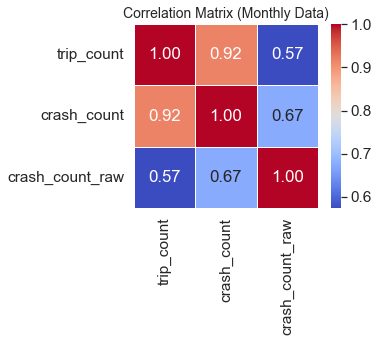

‚úÖ Correlation matrix plot saved to: ..\results\dataAnalysis\extra_analysis\correlation_matrix_monthly_trips_crashes.png


In [34]:
# === Correlation Analysis ===
correlation_df = merged_df[['trip_count', 'crash_count', 'crash_count_raw']]
correlation_matrix = correlation_df.corr()

print("\nüìä Correlation Matrix (Monthly Data):")
print(correlation_matrix)

# === Optional: Visualize the Correlation Matrix ===
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Matrix (Monthly Data)", fontsize=14)

plt.tight_layout()
# Save heatmap
correlation_plot_path = output_dir / "correlation_matrix_monthly_trips_crashes.png"
plt.savefig(correlation_plot_path, dpi=300)

plt.show()

print(f"‚úÖ Correlation matrix plot saved to: {correlation_plot_path}")


# crash_counts_by_weekday vs usage

..\results\dataAnalysis\2013\trips_by_weekday.csv
..\results\dataAnalysis\2014\trips_by_weekday.csv
..\results\dataAnalysis\2015\trips_by_weekday.csv
..\results\dataAnalysis\2016\trips_by_weekday.csv
..\results\dataAnalysis\2017\trips_by_weekday.csv
..\results\dataAnalysis\2018\trips_by_weekday.csv
..\results\dataAnalysis\2019\trips_by_weekday.csv
..\results\dataAnalysis\2020\trips_by_weekday.csv
..\results\dataAnalysis\2021\trips_by_weekday.csv
..\results\dataAnalysis\2022\trips_by_weekday.csv
..\results\dataAnalysis\2023\trips_by_weekday.csv
..\results\dataAnalysis\2024\trips_by_weekday.csv
..\results\dataAnalysis\2025\trips_by_weekday.csv


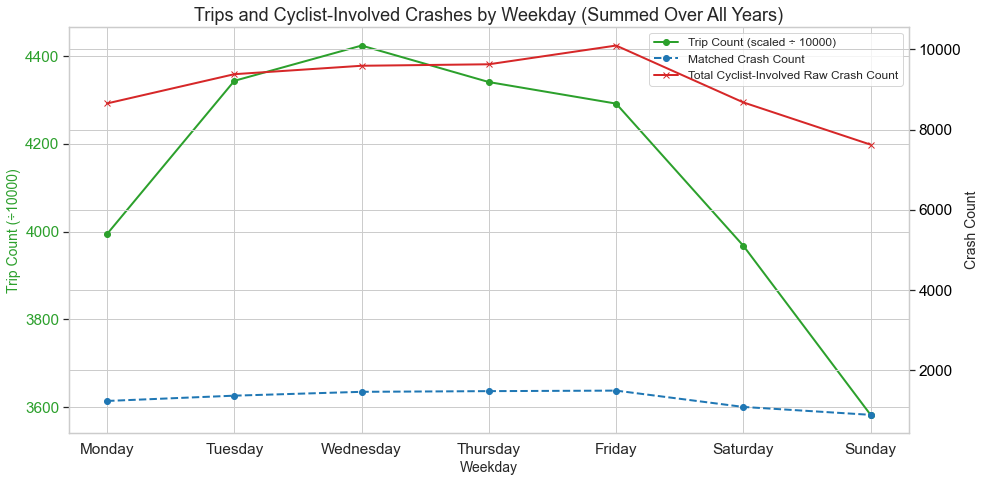

‚úÖ Plot saved to: ..\results\dataAnalysis\extra_analysis\trips_and_crashes_by_weekday_all_years.png


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup paths
results_root = Path("../results/dataAnalysis")
output_dir = results_root / "extra_analysis"
output_dir.mkdir(parents=True, exist_ok=True)

# Define weekday order for consistent indexing
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Aggregate trips by weekday over all years
trips_list = []
for file in results_root.glob("*/trips_by_weekday.csv"):
    print(file)
    df = pd.read_csv(file, index_col=0, names=['weekday', 'trip_count'], header=0)
    df['trip_count'] = pd.to_numeric(df['trip_count'], errors='coerce').fillna(0).astype(int)
    trips_list.append(df)

trips_df_all = pd.concat(trips_list)
trips_sum = trips_df_all.groupby(level=0).sum().reindex(weekday_order).fillna(0).astype(int)

# Aggregate matched crashes by weekday over all years
matched_list = []
for file in results_root.glob("*/crash_counts_by_weekday.csv"):
    df = pd.read_csv(file, index_col=0, names=['weekday', 'crash_count'], header=0)
    df['crash_count'] = pd.to_numeric(df['crash_count'], errors='coerce').fillna(0).astype(int)
    matched_list.append(df)

matched_df_all = pd.concat(matched_list)
matched_sum = matched_df_all.groupby(level=0).sum().reindex(weekday_order).fillna(0).astype(int)

# Load raw crash data from full crash CSV (all years)
raw_crash_path = "..//accident_data//sorted_bike_crashes.csv"
bike_accidents = pd.read_csv(raw_crash_path)
bike_accidents['CRASH_DATETIME'] = pd.to_datetime(bike_accidents['CRASH_DATETIME'], errors='coerce')

raw_crash_counts = (
    bike_accidents['CRASH_DATETIME']
    .dropna()
    .dt.day_name()
    .value_counts()
    .reindex(weekday_order)
    .fillna(0)
    .astype(int)
)

# Combine into one DataFrame
combined_df = pd.DataFrame({
    'trip_count': trips_sum['trip_count'],
    'matched_crash_count': matched_sum['crash_count'],
    'raw_crash_count': raw_crash_counts
})

# Optional normalization: crashes per 100k trips
combined_df['matched_crash_rate_per_100k_trips'] = combined_df['matched_crash_count'] / combined_df['trip_count'] * 100_000
combined_df['raw_crash_rate_per_100k_trips'] = combined_df['raw_crash_count'] / combined_df['trip_count'] * 100_000

# Plotting
sns.set(style="whitegrid", font_scale=1.4)
fig, ax1 = plt.subplots(figsize=(14, 7))

color_trips = 'tab:green'
color_matched = 'tab:blue'
color_raw = 'tab:red'

trip_scale = 10000  # scale trips down for plotting

# Plot trips scaled down
ax1.plot(combined_df.index, combined_df['trip_count'] / trip_scale,
         label=f'Trip Count (scaled √∑ {trip_scale})',
         marker='o', linewidth=2, color=color_trips)
ax1.set_ylabel(f"Trip Count (√∑{trip_scale})", color=color_trips, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_trips)
ax1.set_xlabel("Weekday", fontsize=14)

# Plot matched and raw crashes on second y-axis
ax2 = ax1.twinx()
ax2.plot(combined_df.index, combined_df['matched_crash_count'],
         label='Matched Crash Count',
         marker='o', linestyle='--', linewidth=2, color=color_matched)
ax2.plot(combined_df.index, combined_df['raw_crash_count'],
         label='Total Cyclist-Involved Raw Crash Count',
         marker='x', linestyle='-', linewidth=2, color=color_raw)
ax2.set_ylabel("Crash Count", fontsize=14)
ax2.tick_params(axis='y', labelcolor='black')

# Titles and legend
plt.title("Trips and Cyclist-Involved Crashes by Weekday (Summed Over All Years)", fontsize=18)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=12)

plt.tight_layout()

# Save plot
output_file = output_dir / "trips_and_crashes_by_weekday_all_years.png"
plt.savefig(output_file, dpi=300)
plt.show()

print(f"‚úÖ Plot saved to: {output_file}")



üìä Correlation Matrix (Weekday Totals):
                     trip_count  matched_crash_count  raw_crash_count
trip_count             1.000000             0.959199         0.939112
matched_crash_count    0.959199             1.000000         0.967130
raw_crash_count        0.939112             0.967130         1.000000


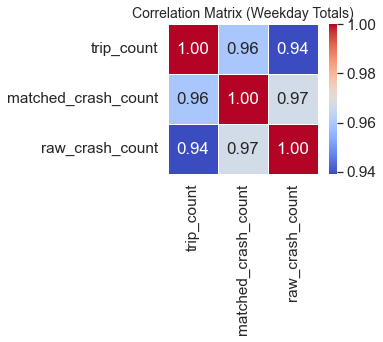

‚úÖ Correlation matrix heatmap saved to: ..\results\dataAnalysis\extra_analysis\correlation_matrix_weekday_trips_crashes.png


In [33]:
# === Correlation Analysis: By Weekday ===
correlation_matrix = combined_df[['trip_count', 'matched_crash_count', 'raw_crash_count']].corr()

print("\nüìä Correlation Matrix (Weekday Totals):")
print(correlation_matrix)

# === Optional: Heatmap of correlation matrix ===
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Matrix (Weekday Totals)", fontsize=14)
plt.tight_layout()

# Save heatmap
correlation_plot_path = output_dir / "correlation_matrix_weekday_trips_crashes.png"
plt.savefig(correlation_plot_path, dpi=300)
plt.show()

print(f"‚úÖ Correlation matrix heatmap saved to: {correlation_plot_path}")


# crash_counts_by_hour vs usage

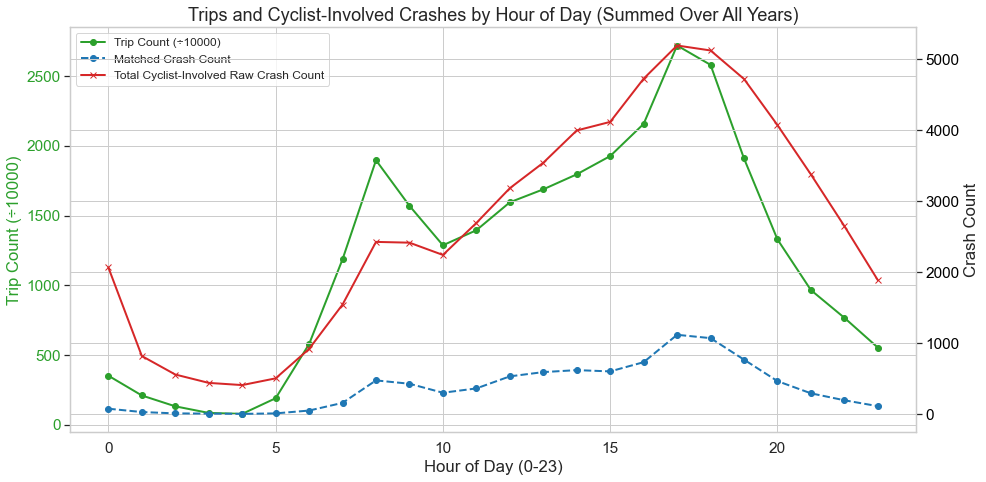

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === Setup paths ===
results_root = Path("../results/dataAnalysis")
output_dir = results_root / "extra_analysis"
output_dir.mkdir(parents=True, exist_ok=True)

# === Load and combine all trips_by_hour.csv files ===
trips_hour_list = []
for file in results_root.glob("*/trips_by_hour.csv"):
    df = pd.read_csv(file, header=0)
    df.columns = ['hour', 'trip_count']
    df['hour'] = pd.to_numeric(df['hour'], errors='coerce')
    df['trip_count'] = pd.to_numeric(df['trip_count'], errors='coerce').fillna(0).astype(int)
    trips_hour_list.append(df)

trips_hour_all = pd.concat(trips_hour_list, ignore_index=True)
trips_by_hour_sum = trips_hour_all.groupby('hour')['trip_count'].sum().reindex(range(24)).fillna(0).astype(int)

# === Load and combine all matched crash_counts_by_hour.csv files ===
matched_crash_list = []
for file in results_root.glob("*/crash_counts_by_hour.csv"):
    df = pd.read_csv(file, header=0)
    df.columns = ['hour', 'crash_count']
    df['hour'] = pd.to_numeric(df['hour'], errors='coerce')
    df['crash_count'] = pd.to_numeric(df['crash_count'], errors='coerce').fillna(0).astype(int)
    matched_crash_list.append(df)

matched_hour_all = pd.concat(matched_crash_list, ignore_index=True)
matched_by_hour_sum = matched_hour_all.groupby('hour')['crash_count'].sum().reindex(range(24)).fillna(0).astype(int)

# === Load raw crash data ===
crash_data_path = Path("../accident_data/sorted_bike_crashes.csv")
raw_crash_df = pd.read_csv(crash_data_path)
raw_crash_df['CRASH_DATETIME'] = pd.to_datetime(raw_crash_df['CRASH_DATETIME'], errors='coerce')
raw_crash_by_hour = (
    raw_crash_df['CRASH_DATETIME']
    .dropna()
    .dt.hour
    .value_counts()
    .reindex(range(24))
    .fillna(0)
    .astype(int)
)

# === Combine into one DataFrame ===
combined_df = pd.DataFrame({
    'trip_count': trips_by_hour_sum,
    'matched_crash_count': matched_by_hour_sum,
    'raw_crash_count': raw_crash_by_hour
})

# === Normalize crashes per 100k trips ===
combined_df['matched_crash_rate_per_100k'] = combined_df['matched_crash_count'] / combined_df['trip_count'] * 100_000
combined_df['raw_crash_rate_per_100k'] = combined_df['raw_crash_count'] / combined_df['trip_count'] * 100_000

# === Plotting ===
sns.set(style="whitegrid", font_scale=1.4)
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot trip counts
trip_scale = 10000
ax1.plot(combined_df.index, combined_df['trip_count'] / trip_scale,
         label=f'Trip Count (√∑{trip_scale})', color='tab:green', marker='o', linewidth=2)
ax1.set_ylabel(f'Trip Count (√∑{trip_scale})', color='tab:green')
ax1.set_xlabel('Hour of Day (0-23)')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Plot crashes
ax2 = ax1.twinx()
ax2.plot(combined_df.index, combined_df['matched_crash_count'],
         label='Matched Crash Count', color='tab:blue', marker='o', linestyle='--', linewidth=2)
ax2.plot(combined_df.index, combined_df['raw_crash_count'],
         label='Total Cyclist-Involved Raw Crash Count', color='tab:red', marker='x', linestyle='-', linewidth=2)
ax2.set_ylabel('Crash Count')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=12)

plt.title("Trips and Cyclist-Involved Crashes by Hour of Day (Summed Over All Years)", fontsize=18)
plt.tight_layout()

# Save
output_file = output_dir / "trips_and_crashes_by_hour_all_years.png"
plt.savefig(output_file, dpi=300)
plt.show()



üìä Correlation Matrix (Hourly Data):
                     trip_count  matched_crash_count  raw_crash_count
trip_count             1.000000             0.961722         0.902597
matched_crash_count    0.961722             1.000000         0.933602
raw_crash_count        0.902597             0.933602         1.000000


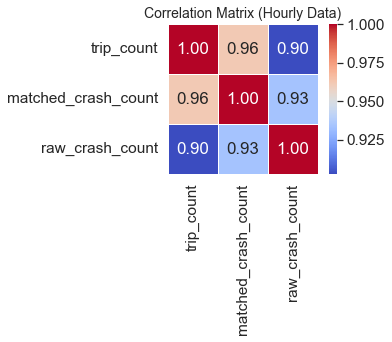

‚úÖ Correlation heatmap saved to:
..\results\dataAnalysis\extra_analysis\correlation_matrix_trips_crashes_by_hour.png


In [25]:
# === Correlation Matrix ===
correlation_matrix = combined_df[['trip_count', 'matched_crash_count', 'raw_crash_count']].corr()

print("\nüìä Correlation Matrix (Hourly Data):")
print(correlation_matrix)

# === Optional: Visualize the Correlation Matrix ===
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Matrix (Hourly Data)", fontsize=14)
plt.tight_layout()

# Save correlation heatmap
correlation_output_path = output_dir / "correlation_matrix_trips_crashes_by_hour.png"
plt.savefig(correlation_output_path, dpi=300)
plt.show()

print(f"‚úÖ Correlation heatmap saved to:\n{correlation_output_path}")


# Top 10 Most Matched Cyclist Involved Stations by Total Trips

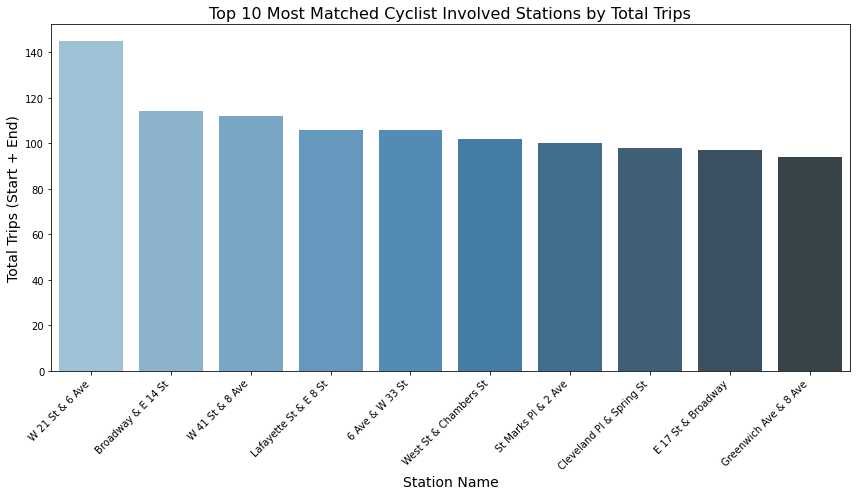

‚úÖ Popular station plot saved to:
..//results//dataAnalysis//extra_analysis//top10_matched_bike_crash_involved_stations.png


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
csv_path = "..//results//matched_trips//matched_crashes_all//all_years_matched_crashes.csv"
df = pd.read_csv(csv_path)

# Use original column names directly
# Count trips per station (start and end)
start_counts = df['start station name'].value_counts().rename("start_count")
end_counts = df['end station name'].value_counts().rename("end_count")

# Combine and compute total usage
total_counts = pd.concat([start_counts, end_counts], axis=1).fillna(0)
total_counts['total_trips'] = total_counts['start_count'] + total_counts['end_count']

# Sort and get top 10 stations
top10_stations = total_counts.sort_values(by='total_trips', ascending=False).head(10).reset_index()
top10_stations = top10_stations.rename(columns={'index': 'station_name'})

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top10_stations,
    x='station_name',
    y='total_trips',
    palette='Blues_d'
)
plt.title('Top 10 Most Matched Cyclist Involved Stations by Total Trips', fontsize=16)
plt.xlabel('Station Name', fontsize=14)
plt.ylabel('Total Trips (Start + End)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
output_path = "..//results//dataAnalysis//extra_analysis//top10_matched_bike_crash_involved_stations.png"
plt.savefig(output_path, dpi=300)

plt.show()

print(f"‚úÖ Popular station plot saved to:\n{output_path}")


# Distribution of Cyclist Involved Accident Trip Durations (0‚Äì120 min)

üìä Trip Duration (minutes) - Basic Stats:
count    3232.000000
mean       13.192827
std        10.008027
min         1.083333
25%         6.545833
50%        10.383333
75%        17.033333
90%        25.828333
95%        31.900000
99%        46.443833
max       106.583333
Name: trip_duration_min, dtype: float64


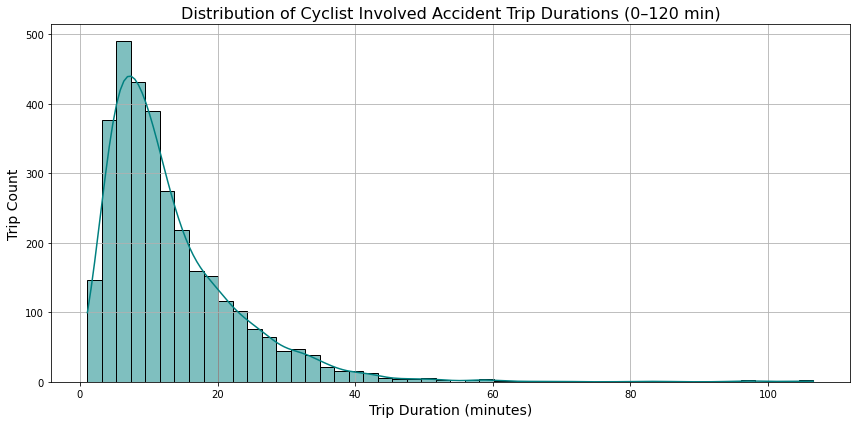

‚úÖ Trip duration distribution plot saved to:
..//results//dataAnalysis//extra_analysis//trip_duration_distribution.png


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
csv_path = "..//results//matched_trips//matched_crashes_all//all_years_matched_crashes.csv"
df = pd.read_csv(csv_path)

# Check column name (use original)
duration_col = 'tripduration'  # Usually in seconds

# Convert to minutes for readability
df['trip_duration_min'] = df[duration_col] / 60

# Optional: filter out extreme outliers (e.g., > 2 hours = 120 min)
df_filtered = df[df['trip_duration_min'] <= 120]

# Basic stats
print("üìä Trip Duration (minutes) - Basic Stats:")
print(df_filtered['trip_duration_min'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['trip_duration_min'], bins=50, kde=True, color='teal')
plt.title('Distribution of Cyclist Involved Accident Trip Durations (0‚Äì120 min)', fontsize=16)
plt.xlabel('Trip Duration (minutes)', fontsize=14)
plt.ylabel('Trip Count', fontsize=14)
plt.grid(True)
plt.tight_layout()

# Save plot
output_path = "..//results//dataAnalysis//extra_analysis//trip_duration_distribution.png"
plt.savefig(output_path, dpi=300)

plt.show()

print(f"‚úÖ Trip duration distribution plot saved to:\n{output_path}")


# Cyclist Involved Accident Trip Count by Usertype

üë• Unique user types:
['Customer' 'Subscriber' 'member' 'casual']

üìä Usertype Distribution:
     usertype  trip_count
0      member        4556
1  Subscriber        2867
2      casual        1191
3    Customer         371


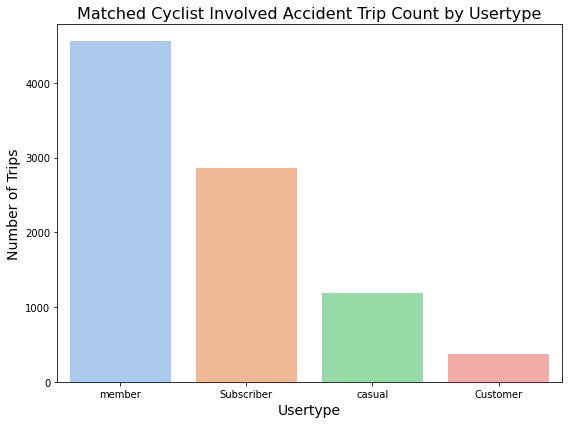

‚úÖ Usertype distribution plot saved to:
..//results//dataAnalysis//extra_analysis//usertype_distribution.png


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
csv_path = "..//results//matched_trips//matched_crashes_all//all_years_matched_crashes.csv"
df = pd.read_csv(csv_path)

# Check unique values
print("üë• Unique user types:")
print(df['usertype'].unique())

# Count user types
usertype_counts = df['usertype'].value_counts().reset_index()
usertype_counts.columns = ['usertype', 'trip_count']

# Print table
print("\nüìä Usertype Distribution:")
print(usertype_counts)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=usertype_counts,
    x='usertype',
    y='trip_count',
    palette='pastel'
)
plt.title('Matched Cyclist Involved Accident Trip Count by Usertype', fontsize=16)
plt.xlabel('Usertype', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.tight_layout()

# Save the plot
output_path = "..//results//dataAnalysis//extra_analysis//usertype_distribution.png"
plt.savefig(output_path, dpi=300)

plt.show()

print(f"‚úÖ Usertype distribution plot saved to:\n{output_path}")


# Crash Match Type Distribution

üõ†Ô∏è Unique crash match types:
['end' 'start' 'both']

üìä Crash Match Type Distribution:
  crash_match_type  count
0              end   4484
1            start   4379
2             both    122


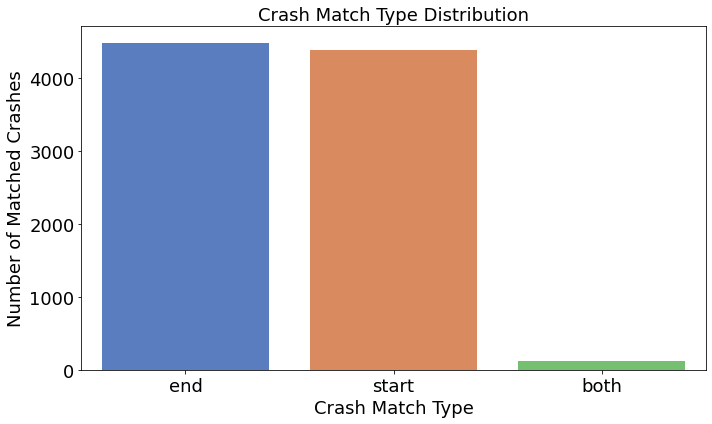

‚úÖ Crash match type distribution plot saved to:
..//results//dataAnalysis//extra_analysis//crash_match_type_distribution.png


In [19]:
# Check unique crash_match_type values
print("üõ†Ô∏è Unique crash match types:")
print(df['crash_match_type'].unique())

# Count crash_match_type occurrences
crash_type_counts = df['crash_match_type'].value_counts().reset_index()
crash_type_counts.columns = ['crash_match_type', 'count']

# Print table
print("\nüìä Crash Match Type Distribution:")
print(crash_type_counts)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=crash_type_counts,
    x='crash_match_type',
    y='count',
    palette='muted'
)
plt.title('Crash Match Type Distribution', fontsize=18)
plt.xlabel('Crash Match Type', fontsize=18)
plt.ylabel('Number of Matched Crashes', fontsize=18)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# Save the plot
output_path_crash = "..//results//dataAnalysis//extra_analysis//crash_match_type_distribution.png"
plt.savefig(output_path_crash, dpi=300)

plt.show()

print(f"‚úÖ Crash match type distribution plot saved to:\n{output_path_crash}")


# Trip Duration Distribution by Crash Match Type


üìà Trip Duration (Minutes) Stats by Crash Match Type:
                   count       mean        std       min       25%        50%  \
crash_match_type                                                                
both                21.0  19.646825  22.157672  1.083333  4.233333  14.316667   
end               1611.0  13.249421  10.541781  1.166667  6.550000  10.316667   
start             1600.0  13.051135   9.153330  1.316667  6.575000  10.400000   

                        75%         max  
crash_match_type                         
both              26.616667   84.633333  
end               16.825000  106.583333  
start             17.195833   97.766667  


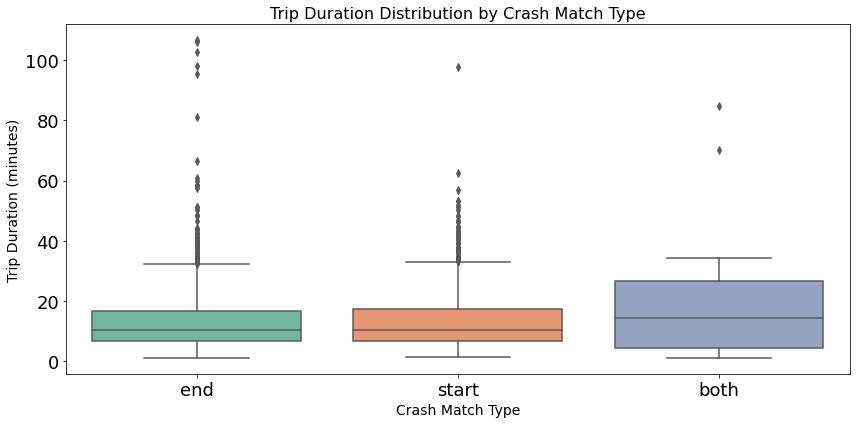

‚úÖ Trip duration (in minutes) by crash match type plot saved to:
..//results//dataAnalysis//extra_analysis//tripduration_by_crash_match_type_minutes.png


In [22]:
# Convert tripduration to minutes
df['tripduration_minutes'] = pd.to_numeric(df['tripduration'], errors='coerce') / 60

# Drop rows with missing crash_match_type or tripduration
df_clean = df.dropna(subset=['crash_match_type', 'tripduration_minutes'])

# Optional: Filter out extreme durations (e.g., over 120 minutes)
df_clean = df_clean[df_clean['tripduration_minutes'] <= 120]

# Grouped statistics
print("\nüìà Trip Duration (Minutes) Stats by Crash Match Type:")
print(df_clean.groupby('crash_match_type')['tripduration_minutes'].describe())

# Plot - Boxplot of trip duration by crash match type
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_clean,
    x='crash_match_type',
    y='tripduration_minutes',
    palette='Set2'
)
plt.title('Trip Duration Distribution by Crash Match Type', fontsize=16)
plt.xlabel('Crash Match Type', fontsize=14)
plt.ylabel('Trip Duration (minutes)', fontsize=14)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# Save plot
output_path_duration = "..//results//dataAnalysis//extra_analysis//tripduration_by_crash_match_type_minutes.png"
plt.savefig(output_path_duration, dpi=300)

plt.show()

print(f"‚úÖ Trip duration (in minutes) by crash match type plot saved to:\n{output_path_duration}")


# Age analysis: Bike Usage and Cyclist Involved Crashes by Age

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data
file_path = "..//results//dataAnalysis//extra_analysis//all_years_crash_usage_age_distribution.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()  # Clean column names
df_plot = df.copy()

# Create output dir
plot_dir = "..//results//dataAnalysis//extra_analysis"
os.makedirs(plot_dir, exist_ok=True)

# Set global font styles
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 16,
    'figure.figsize': (25, 6)
})

# === Plot 1: Dual Y-Axis: Usage vs Crashes ===
#plt.figure(figsize=(30, 8))

fig1, ax1 = plt.subplots(figsize=(30, 8))
color1 = "deepskyblue"
color2 = "red"

# Bar for usage
ax1.bar(df_plot["age"], df_plot["usage_count"], color=color1, label="Usage", alpha=0.7)
ax1.set_xlabel("Age")
ax1.set_ylabel("Usage Count", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Line for crashes
ax2 = ax1.twinx()
ax2.plot(df_plot["age"], df_plot["crash_count"], color=color2, marker="o", linewidth=2, label="Crashes")
ax2.set_ylabel("Crash Count", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Title and legend
fig1.suptitle("Bike Usage and Cyclist Involved Crashes by Age (Dual Axis)")
lines_labels = ax1.get_legend_handles_labels()[0] + ax2.get_legend_handles_labels()[0]
labels = ax1.get_legend_handles_labels()[1] + ax2.get_legend_handles_labels()[1]
ax1.legend(lines_labels, labels, loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "dual_axis_usage_crashes_by_age.png"), dpi=300)
plt.show()

# === Plot 2: Crash Percentage by Age ===
fig2, ax3 = plt.subplots(figsize=(30, 8))

sns.lineplot(x="age", y="percentage", data=df_plot, marker='o', color='darkorange', linewidth=2)
ax3.set_title("Cyclist Involved Crash Percentage by Age (All Years)")
ax3.set_xlabel("Age")
ax3.set_ylabel("Crash Percentage (%)")
#plt.xticks(rotation=45)
plt.tight_layout()

# Save
plt.savefig(os.path.join(plot_dir, "crash_percentage_by_age.png"), dpi=300)
plt.show()
